# `“labDrawChessboard.ipynb”` - Создает изображение шахматной доски с заданными параметрами. 
`Параметры:`
- size (int): Размер изображения (ширина и высота в пикселях).
- square_size (int): Размер одной клетки шахматной доски в пикселях.
- light_color (tuple): Цвет светлых клеток в формате RGB.
- dark_color (tuple): Цвет темных клеток в формате RGB.
- border_size (int): Толщина рамки вокруг шахматной доски в пикселях (опционально).
- border_color (tuple): Цвет рамки в формате RGB (опционально).
- show_labels (bool): Показывать ли нумерацию горизонталей и буквенные обозначения вертикалей.  
`Возвращает:`
- Image: Изображение шахматной доски.


In [6]:
from PIL import Image, ImageDraw, ImageFont

def create_chessboard(size, square_size, light_color, dark_color, border_size=0, border_color=None, show_labels=False):
    
    
    # Учитываем место для нумерации (по 1 клетке с каждой стороны)
    full_size = size + 2 * square_size
    image = Image.new('RGB', (full_size, full_size), light_color)
    draw = ImageDraw.Draw(image)
    
    # Рисование клеток шахматной доски
    for row in range(8):
        for col in range(8):
            x1 = (col + 1) * square_size
            y1 = (row + 1) * square_size
            x2 = x1 + square_size
            y2 = y1 + square_size
            if (row + col) % 2 == 1:
                draw.rectangle((x1, y1, x2, y2), fill=dark_color)
    
    # Рисование рамки (если указано)
    if border_size > 0 and border_color is not None:
        draw.rectangle((0, 0, full_size, full_size), outline=border_color, width=border_size)
    
    # Рисование обводки вокруг основной области клеток
    board_outline_color = (0, 0, 0)  # черный цвет
    draw.rectangle(
        [(square_size, square_size), (full_size - square_size, full_size - square_size)],
        outline=board_outline_color,
        width=2
    )
    
    # Рисование нумерации горизонталей и буквенных обозначений вертикалей (если указано)
    if show_labels:
        font = ImageFont.truetype('arial.ttf', square_size // 4)
        for i in range(8):
            # Нумерация горизонталей
            label = str(8 - i)
            label_bbox = font.getbbox(label)
            label_width = label_bbox[2] - label_bbox[0]
            label_height = label_bbox[3] - label_bbox[1]
            label_x = (square_size - label_width) // 2
            label_y = (i + 1) * square_size + (square_size - label_height) // 2
            draw.text((label_x, label_y), label, font=font, fill=(0, 0, 0))
            draw.text((full_size - square_size + label_x, label_y), label, font=font, fill=(0, 0, 0))
            
            # Буквенные обозначения вертикалей
            label = chr(ord('a') + i)
            label_bbox = font.getbbox(label)
            label_width = label_bbox[2] - label_bbox[0]
            label_height = label_bbox[3] - label_bbox[1]
            label_x = (i + 1) * square_size + (square_size - label_width) // 2
            label_y = (square_size - label_height) // 2
            draw.text((label_x, label_y), label, font=font, fill=(0, 0, 0))
            draw.text((label_x, full_size - square_size + label_y), label, font=font, fill=(0, 0, 0))
    
    return image



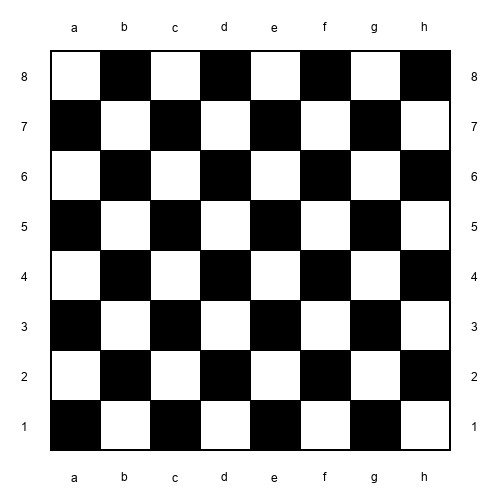

In [7]:
chessboard1 = create_chessboard(400, 50, (255, 255, 255), (0, 0, 0), show_labels=True)
display(chessboard1)

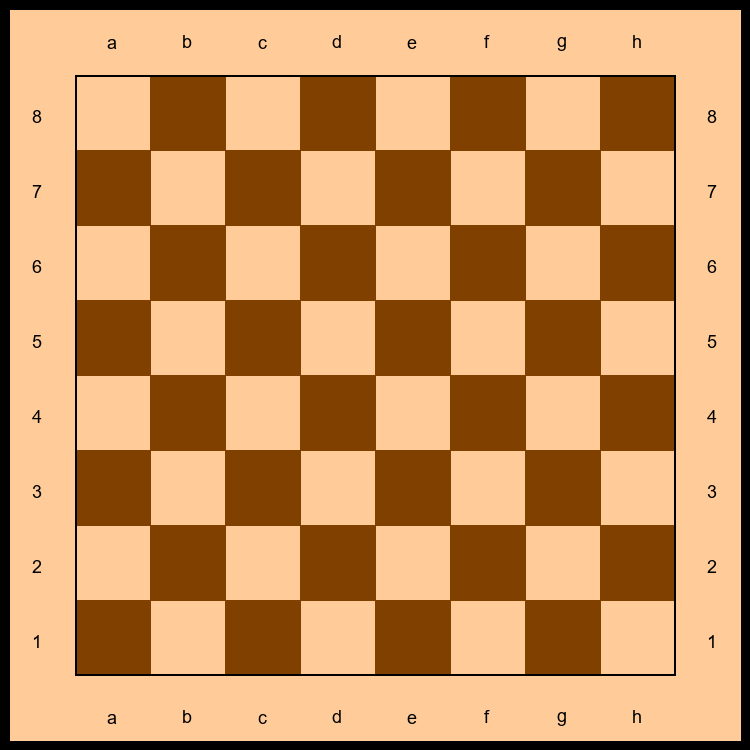

In [8]:
chessboard2 = create_chessboard(600, 75, (255, 204, 153), (128, 64, 0), border_size=10, border_color=(0, 0, 0), show_labels=True)
display(chessboard2)

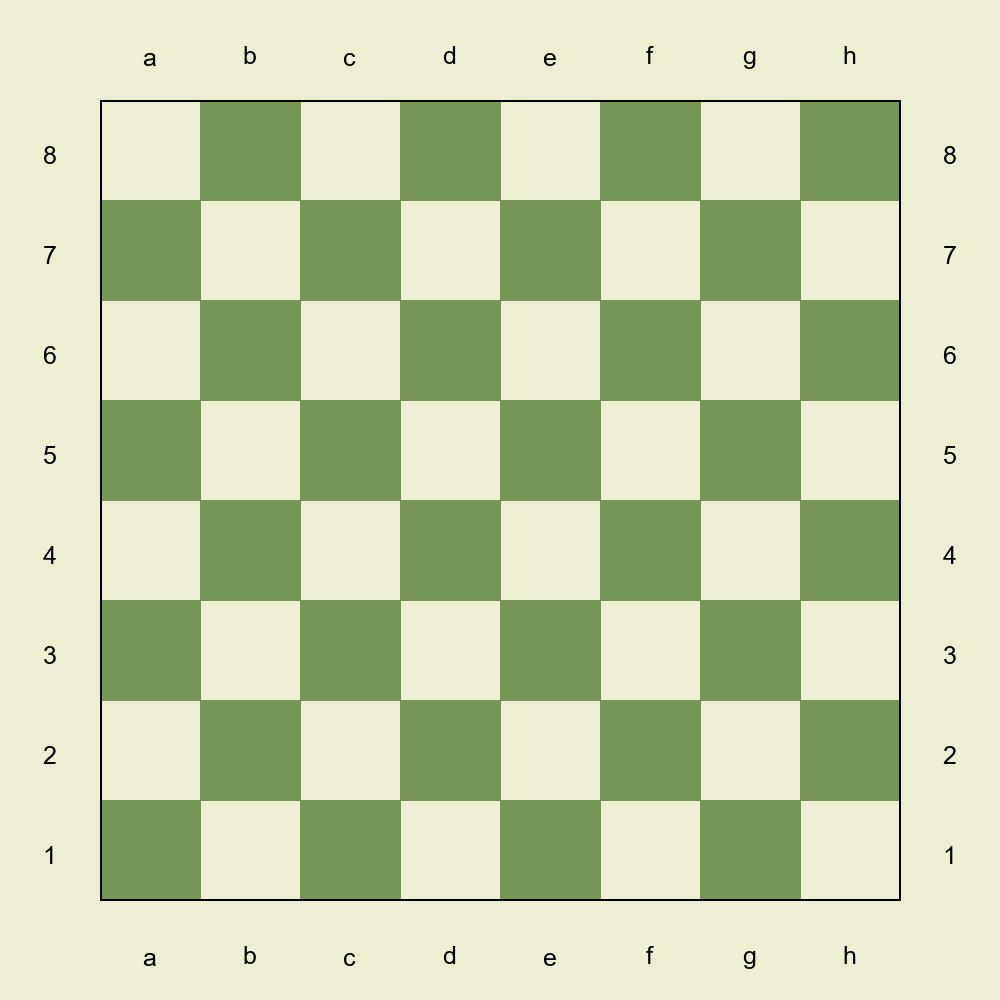

In [9]:
chessboard3 = create_chessboard(800, 100, (238, 238, 210), (118, 150, 86), show_labels=True)
display(chessboard3)